In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#using 2 antennas
dataset = pd.read_csv('human_walking_direction_alaa_422.csv').drop('Unnamed: 0',axis=1)

1. We collected 100 packets every 5 secs for each behavior. 
2. 2000 samples for left, right, and no_person. 1000 samples for up.
3. We have 56 subcarrier and we will use 30 subcarriers
4. We have 2 * 2 antennas. So, we have four csi values at receiver (1_1, 1_2, 2_1, 2_2)=>(i_j), i for receiver and j for transmitter.
5. I will loop for each subcarrier and select 100 values for packet num for example subcarrier 0 contains 2000 values for no of packets, So 2000/100-> 20 behavior.
6. We have 30 subcarriers, then we will have 20*30=600 rows for left, right, and no person but for up 1000/100 * 30=300 therefore the total number of rows=600+600+600+300=2100
7. for columns, We have 100 packet for each antenna pair then 100*4=400 therefore We have 400 amplitudes, 400 phases and label col then the total number of columns=801
8. Therefore for each row we have the amplitudes and phases for 100 packets (one behavior)



1. s_n -> subcarrier num
2. a_n -> antenna_num
3. d_n -> data_num
4. tp_n ->  total number of packets for each behavior
5. tb_n ->  total number of behaviors for each activty
6. N  -> activities number
7. TR_n -> total number of rows
8. TC_n -> total number of columns
9. tb_n= d_n/tp_n    ->          (tb_n= 2000/100 =20   , tb_n= 1000/100 =10)
10. TR_n= tb_n*s_n*N   ->         (TR_n = 20*30*3 + 10*30*1=1800+300=2100)
11. TC_n= (tp_n * a_n  * 2) + 1  ->   (TC_n= (100*4*2)+1 = 801)
12. DS_n = TR_n * TC_n ->  (2100*801)

 

In [3]:
dataset.head()

,phase antenna1_1:0,phase antenna1_1:1,phase antenna1_1:2,phase antenna1_1:3,phase antenna1_1:4,phase antenna1_1:5,phase antenna1_1:6,phase antenna1_1:7,phase antenna1_1:8,phase antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,-0.571561,-0.734530,0.305314,-0.123741,-0.487818,-0.226326,-0.652369,-0.719950,-0.128074,-0.265565,...,-0.712711,0.974077,5.333010,1.983630,-2.152583,-0.158812,0.565402,1.635685,7.179814,left_direction
1,-0.977986,0.553301,-0.906196,-0.003784,-0.756144,0.214334,-0.835414,-1.116300,-0.210708,-0.316562,...,-0.296421,0.700107,1.410436,1.166843,-0.851206,0.164715,0.281707,4.227542,-3.500976,left_direction
2,-0.823145,0.581404,-0.115928,0.348250,-0.611200,0.031703,-0.249519,-0.460939,-0.285507,-0.709333,...,7.270115,2.843414,0.342547,3.710684,-0.303287,-1.260458,0.416415,-0.134489,0.020201,left_direction
3,-0.093766,-1.156815,-0.250823,-0.466772,-0.005280,0.222943,-0.193296,-0.897287,0.102117,0.417920,...,2.912746,1.683308,5.378212,-7.726985,0.113909,-0.917352,0.381739,-0.065713,2.754976,left_direction
4,0.370644,-0.557734,-0.865712,-0.478936,-0.474228,0.221993,-0.432801,-0.423972,-0.614260,-0.738790,...,-6.316582,-0.629405,2.490697,0.183294,1.092096,1.941278,7.032475,3.046289,1.071862,left_direction


C:\Users\hanan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


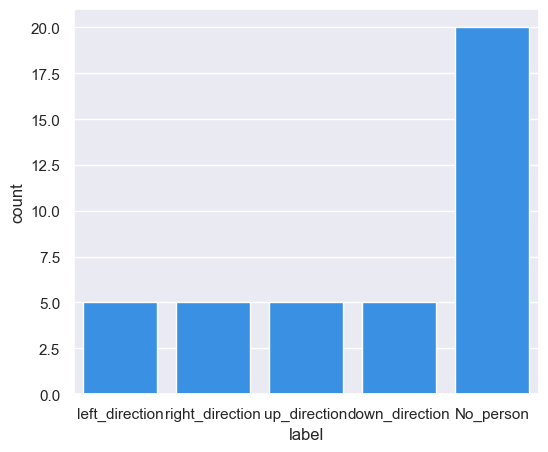

In [4]:
import seaborn as sns

sns.set(color_codes=True)

plt.figure(0, (6, 5))
sns_plot = sns.countplot(dataset['label'], color="dodgerblue", label="Compact")


# Train the dataset

In [5]:
#Data encoding: to convert categorical features to numberical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['label']=label_encoder.fit_transform(dataset['label'])

In [6]:
dataset

,phase antenna1_1:0,phase antenna1_1:1,phase antenna1_1:2,phase antenna1_1:3,phase antenna1_1:4,phase antenna1_1:5,phase antenna1_1:6,phase antenna1_1:7,phase antenna1_1:8,phase antenna1_1:9,...,phase antenna2_2:391,phase antenna2_2:392,phase antenna2_2:393,phase antenna2_2:394,phase antenna2_2:395,phase antenna2_2:396,phase antenna2_2:397,phase antenna2_2:398,phase antenna2_2:399,label
0,-0.571561,-0.734530,0.305314,-0.123741,-0.487818,-0.226326,-0.652369,-0.719950,-0.128074,-0.265565,...,-0.712711,0.974077,5.333010,1.983630,-2.152583,-0.158812,0.565402,1.635685,7.179814,2
1,-0.977986,0.553301,-0.906196,-0.003784,-0.756144,0.214334,-0.835414,-1.116300,-0.210708,-0.316562,...,-0.296421,0.700107,1.410436,1.166843,-0.851206,0.164715,0.281707,4.227542,-3.500976,2
2,-0.823145,0.581404,-0.115928,0.348250,-0.611200,0.031703,-0.249519,-0.460939,-0.285507,-0.709333,...,7.270115,2.843414,0.342547,3.710684,-0.303287,-1.260458,0.416415,-0.134489,0.020201,2
3,-0.093766,-1.156815,-0.250823,-0.466772,-0.005280,0.222943,-0.193296,-0.897287,0.102117,0.417920,...,2.912746,1.683308,5.378212,-7.726985,0.113909,-0.917352,0.381739,-0.065713,2.754976,2
4,0.370644,-0.557734,-0.865712,-0.478936,-0.474228,0.221993,-0.432801,-0.423972,-0.614260,-0.738790,...,-6.316582,-0.629405,2.490697,0.183294,1.092096,1.941278,7.032475,3.046289,1.071862,2
5,0.007383,-0.789372,-0.183074,-0.156347,-1.006590,-0.531177,0.082869,-0.242456,0.169505,-0.707808,...,-3.556632,2.920067,2.210011,-0.900516,1.704676,3.988384,2.650788,-0.027904,0.722065,3
6,0.141305,0.133281,-0.038016,-0.319834,0.160228,-0.455514,-0.684978,-0.665000,0.187127,-0.438452,...,2.287324,-0.138639,3.964904,-0.651970,1.478184,0.950432,1.842893,-1.126324,2.883930,3
7,-0.292422,-0.061991,-0.779631,-0.355483,0.150220,0.018090,-0.234624,-0.471060,-0.814227,-1.048380,...,1.854566,-0.187988,1.175382,-5.585512,-1.395701,2.652929,1.460829,1.392504,0.706546,3
8,-0.380471,-0.286697,0.143973,-0.415013,0.484059,-0.493952,-0.441589,0.094126,-0.291503,-0.676276,...,1.293228,0.357223,0.215980,-2.898099,0.482936,-2.309099,-0.036969,-1.516402,2.342726,3
9,-0.450103,0.341788,-0.471931,-0.141946,-0.884826,-0.480234,-0.671868,0.313971,0.065286,-0.540779,...,2.092279,1.770712,-0.632654,3.713187,2.576934,2.056942,0.901743,0.650575,1.470043,3


In [7]:
dataset['label'].unique()

array([2, 3, 4, 1, 0])

In [8]:
y=dataset['label']

In [9]:
X=dataset.drop('label',axis=1)

In [10]:
y

0     2
1     2
2     2
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    4
11    4
12    4
13    4
14    4
15    1
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
Name: label, dtype: int32

In [11]:
#Trainset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size=0.5,random_state=123)

In [12]:
X_train.shape

(20, 1600)

In [13]:
X_test.shape

(20, 1600)

 2      3     4    1    0:
left   right  up  down  No

# classification using ML models

In [14]:
RF_Accuracy=[]
SVM_Accuracy=[]
KNN_Accuracy=[]

# 1. Random Forest Classifier

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfc=RandomForestClassifier(max_depth=12)
classifier_rfc.fit(X_train,y_train)
y_pred_rfc=classifier_rfc.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_rfc))
y_pred_rfc_test=classifier_rfc.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_rfc_test))
RF_Accuracy.append(accuracy_score(y_test,y_pred_rfc_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.55


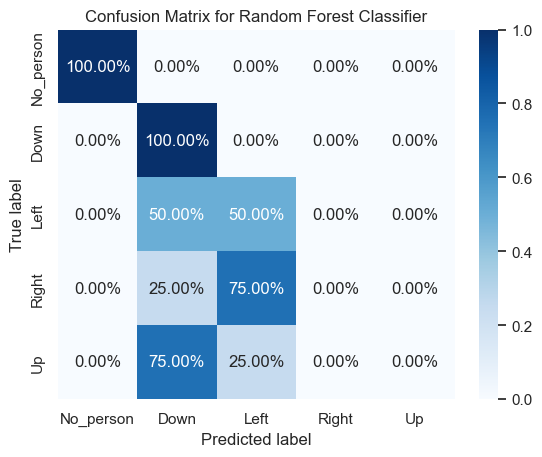

In [17]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [18]:
precision_rfc = precision_score(y_test, y_pred_rfc_test, average='micro')
recall_rfc = recall_score(y_test, y_pred_rfc_test, average='micro')
f1_rfc = f1_score(y_test, y_pred_rfc_test, average='micro')
accuracy_rfc = accuracy_score(y_test, y_pred_rfc_test)

print('Different metrics for testing data')
print("Precision: ", precision_rfc)
print("Recall: ", recall_rfc)
print("F1 score: ", f1_rfc)
print("Accuracy: ", accuracy_rfc)

Different metrics for testing data
Precision:  0.55
Recall:  0.55
F1 score:  0.55
Accuracy:  0.55


In [19]:
report_rfc = classification_report(y_test, y_pred_rfc_test)
print("Classification report for Random Forest:")
print(report_rfc)

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.29      1.00      0.44         2
           2       0.20      0.50      0.29         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4

    accuracy                           0.55        20
   macro avg       0.30      0.50      0.35        20
weighted avg       0.45      0.55      0.47        20



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Random Forest')

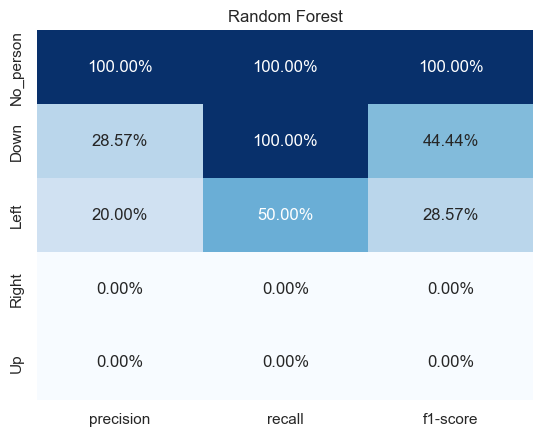

In [20]:
report_rfc = classification_report(y_test, y_pred_rfc_test, output_dict=True)
report_rfc_df = pd.DataFrame(report_rfc).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_rfc_df=report_rfc_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_rfc_df=report_rfc_df.drop(['support'], axis=1)
sns.heatmap(report_rfc_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Random Forest")


# 1.2 Support Vector Machine

In [21]:
from sklearn import svm
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train,y_train)
y_pred_svm=classifier_svm.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_svm))
y_pred_svm_test=classifier_svm.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_svm_test))
SVM_Accuracy.append(accuracy_score(y_test,y_pred_svm_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.55


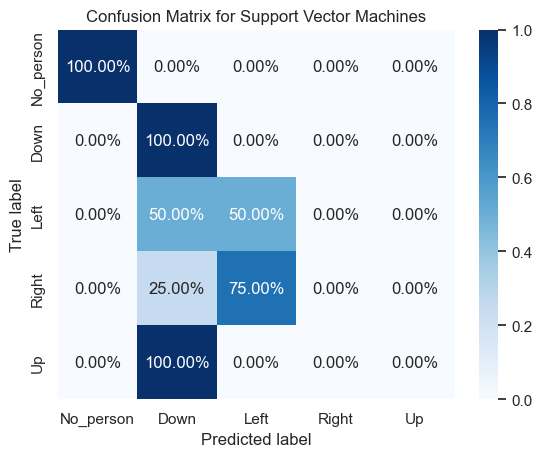

In [22]:
cm_svm = confusion_matrix(y_test, y_pred_svm_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for Support Vector Machines")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [23]:
precision_svm = precision_score(y_test, y_pred_svm_test, average='micro')
recall_svm = recall_score(y_test, y_pred_svm_test, average='micro')
f1_svm = f1_score(y_test, y_pred_svm_test, average='micro')
accuracy_svm = accuracy_score(y_test, y_pred_svm_test)

print('Different metrics for testing data')
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1 score: ", f1_svm)
print("Accuracy: ", accuracy_svm)

Different metrics for testing data
Precision:  0.55
Recall:  0.55
F1 score:  0.55
Accuracy:  0.55


In [24]:
report_svm = classification_report(y_test, y_pred_svm_test)
print("Classification report for Support Vector Machines:")
print(report_svm)

Classification report for Support Vector Machines:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.25      1.00      0.40         2
           2       0.25      0.50      0.33         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4

    accuracy                           0.55        20
   macro avg       0.30      0.50      0.35        20
weighted avg       0.45      0.55      0.47        20



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Support Vector Machines')

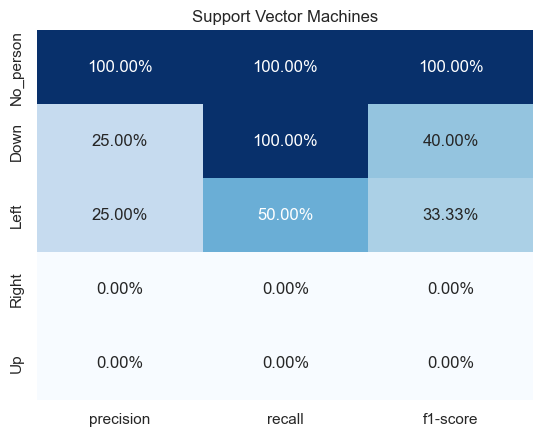

In [25]:
report_svm = classification_report(y_test, y_pred_svm_test, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_svm_df=report_svm_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_svm_df=report_svm_df.drop(['support'], axis=1)
sns.heatmap(report_svm_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("Support Vector Machines")


# 1.3 K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
classifier_knn.fit(X_train,y_train)
y_pred_knn=classifier_knn.predict(X_train)
print("the accuracy of training data: ", accuracy_score(y_train,y_pred_knn))
y_pred_knn_test=classifier_knn.predict(X_test)
print("the accuracy of testing data:  ", accuracy_score(y_test,y_pred_knn_test))
KNN_Accuracy.append(accuracy_score(y_test,y_pred_knn_test))

the accuracy of training data:  1.0
the accuracy of testing data:   0.5


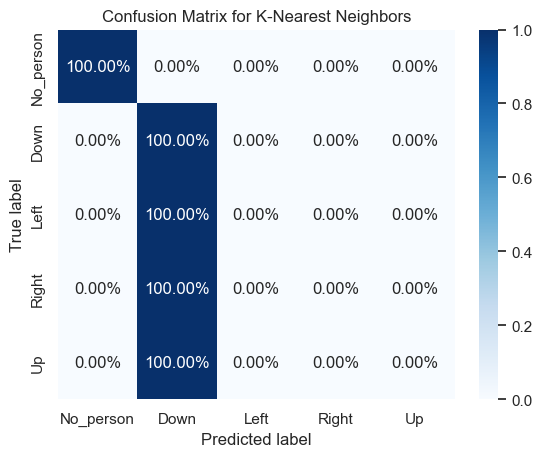

In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn_test, normalize='true')
class_names = ["No_person","Down","Left","Right", "Up"]

# Plot confusion matrix as heatmap

sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt=".2%", vmin=0, vmax=1,xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [28]:
precision_knn = precision_score(y_test, y_pred_knn_test, average='micro')
recall_knn = recall_score(y_test, y_pred_knn_test, average='micro')
f1_knn = f1_score(y_test, y_pred_knn_test, average='micro')
accuracy_knn = accuracy_score(y_test, y_pred_knn_test)

print('Different metrics for testing data')
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1 score: ", f1_knn)
print("Accuracy: ", accuracy_knn)

Different metrics for testing data
Precision:  0.5
Recall:  0.5
F1 score:  0.5
Accuracy:  0.5


In [29]:
report_knn = classification_report(y_test, y_pred_knn_test)
print("Classification report for K-Nearest Neighbors:")
print(report_knn)

Classification report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.17      1.00      0.29         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4

    accuracy                           0.50        20
   macro avg       0.23      0.40      0.26        20
weighted avg       0.42      0.50      0.43        20



C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'K-Nearest Neighbors')

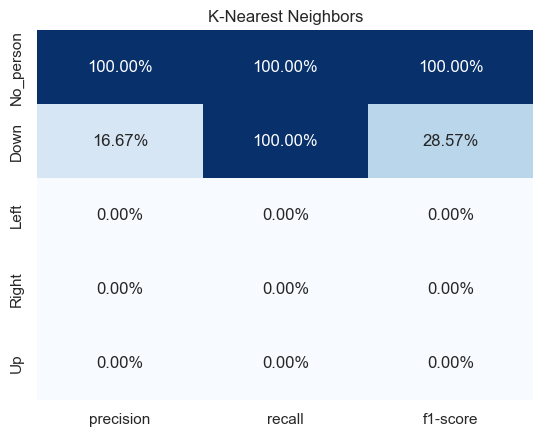

In [30]:
report_knn = classification_report(y_test, y_pred_knn_test, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).transpose()
class_names = ["No_person","Down","Left","Right", "Up"]
report_knn_df=report_knn_df.drop(['macro avg', 'weighted avg', 'accuracy'], axis=0)
report_knn_df=report_knn_df.drop(['support'], axis=1)
sns.heatmap(report_knn_df, annot=True, cmap='Blues', fmt='.2%', cbar=False, yticklabels=class_names)
plt.title("K-Nearest Neighbors")


In [31]:
RF_accuracy=pd.DataFrame(data=RF_Accuracy[0:],
                columns=['RF'])

SVM_accuracy=pd.DataFrame(data=SVM_Accuracy[0:],
                columns=['SVM'])

KNN_accuracy=pd.DataFrame(data=KNN_Accuracy[0:],
                columns=['KNN'])
df_accuracy_new = pd.concat([RF_accuracy,SVM_accuracy,KNN_accuracy], axis=1)
df_accuracy_existing = pd.read_csv('human_walking_direction_df_accuracy_all_volunteers.csv').drop('Unnamed: 0',axis=1)
df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)
df_accuracy

C:\Users\hanan\AppData\Local\Temp\ipykernel_29908\3372602396.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_accuracy = df_accuracy_existing.append(df_accuracy_new, ignore_index=True)


,RF,SVM,KNN
0,0.45,0.45,0.5
1,0.55,0.60,0.7
2,0.60,0.55,0.5
3,0.55,0.55,0.5


In [33]:
df_accuracy.to_csv(r'human_walking_direction_df_accuracy_all_volunteers.csv')